#Handwritten digit recognizer

The dataset used for this is an open source dataset availble in Kaggle. The analysis uses different models acheive high test accuracy.

The dataset is availble on https://www.kaggle.com/c/digit-recognizer. It has images of 32 by 32 pixels in grey scale. 


# Importing Dataset and relevant libraries

In [2]:
import pandas as pd
import numpy as np
import keras
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import *
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import EarlyStopping
from sklearn.linear_model import LogisticRegression
from keras.wrappers.scikit_learn import KerasClassifier
from keras import regularizers

In [7]:
digit_train = pd.read_csv("/content/train.csv")
digit_test = pd.read_csv("/content/test.csv")

##Basic exploratory data analysis

In [9]:
print("digit_train shape :",digit_train.shape)
print("digit_test shape :",digit_test.shape)

digit_train shape : (42000, 785)
digit_test shape : (28000, 784)


Splitting the data into training set and labels

In [54]:
X_train, y_train = digit_train.iloc[:,1:], digit_train["label"]

In [55]:
X_test = digit_test

Since the data has been taken from Kaggle it won't have any null values.

#Visualization

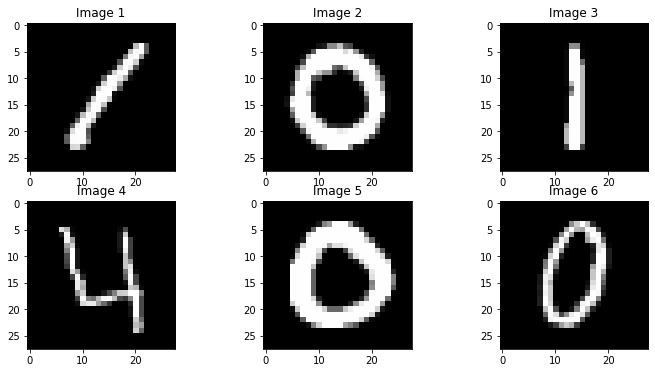

In [56]:
fig, ax = plt.subplots(2,3, figsize = (12,6))
ax[0,0].set_title("Image 1")
ax[0,0].imshow(np.array(X_train.iloc[0]).reshape(28,28), cmap = "gray")
ax[0,1].set_title("Image 2")
ax[0,1].imshow(np.array(X_train.iloc[1]).reshape(28,28), cmap = "gray")
ax[0,2].set_title("Image 3")
ax[0,2].imshow(np.array(X_train.iloc[2]).reshape(28,28), cmap = "gray")
ax[1,0].set_title("Image 4")
ax[1,0].imshow(np.array(X_train.iloc[3]).reshape(28,28), cmap = "gray")
ax[1,1].set_title("Image 5")
ax[1,1].imshow(np.array(X_train.iloc[4]).reshape(28,28), cmap = "gray")
ax[1,2].set_title("Image 6")
ax[1,2].imshow(np.array(X_train.iloc[5]).reshape(28,28), cmap = "gray")

Let's have a look with standarized values

In [57]:
def standarized(data):
  mean_ = data.mean()
  std_ = data.std()
  new_data = (data - mean_)/std_
  return new_data

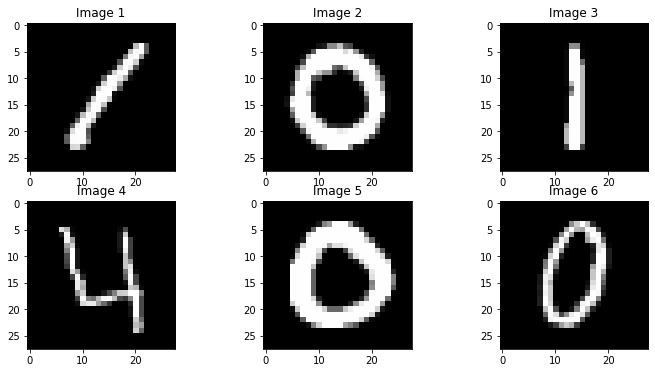

In [58]:

fig, ax = plt.subplots(2,3, figsize = (12,6))
ax[0,0].set_title("Image 1")
ax[0,0].imshow(np.array(standarized(X_train.iloc[0])).reshape(28,28), cmap = "gray")
ax[0,1].set_title("Image 2")
ax[0,1].imshow(np.array(standarized(X_train.iloc[1])).reshape(28,28), cmap = "gray")
ax[0,2].set_title("Image 3")
ax[0,2].imshow(np.array(standarized(X_train.iloc[2])).reshape(28,28), cmap = "gray")
ax[1,0].set_title("Image 4")
ax[1,0].imshow(np.array(standarized(X_train.iloc[3])).reshape(28,28), cmap = "gray")
ax[1,1].set_title("Image 5")
ax[1,1].imshow(np.array(standarized(X_train.iloc[4])).reshape(28,28), cmap = "gray")
ax[1,2].set_title("Image 6")
ax[1,2].imshow(np.array(standarized(X_train.iloc[5])).reshape(28,28), cmap = "gray")

The visualization for standardized values remained the same.

In [59]:
y_train.value_counts(sort=True)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

Text(0.5, 0, 'Labels')

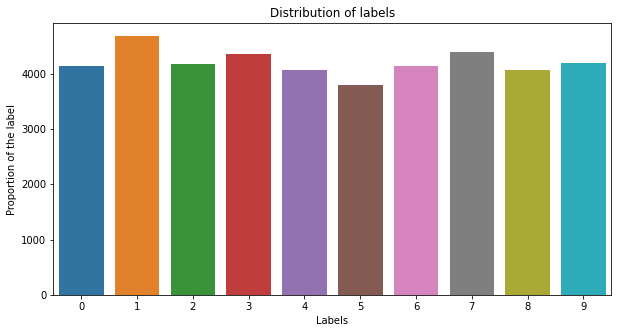

In [60]:
plt.figure(figsize = (10,5))
ax = sns.barplot(x=y_train.value_counts(sort=True).index, y = y_train.value_counts(sort=True).values)
ax.set_title("Distribution of labels")
ax.set_ylabel("Proportion of the label")
ax.set_xlabel("Labels")

The dataset has the highest no. of labels for label "1" and least for "5", but there is enough of all the labels for training.

#Engineering data 

Transforming the data is a key part in ML and DL. Since images are in greyscale the have values from 0 to 255. If we scale the value between 0 and 1 it will help in the future as some values would not dominate others during the training.

In [61]:
#normalizing the dataset
X_train = X_train / 255
X_test = X_test / 255

The labels in the dataset is in the form of numbers. For computational purposes we ned change the values to categories.

In [62]:
#Coverting labels to categorical labels
y_train = to_categorical(y_train, num_classes = 10)

In [63]:
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2)

We will now reshape the data so that it can be used in CNNs.

In [64]:
#Reshaping the data so that it can be used in CNN
X_train_r, X_test_r = X_train.values.reshape(-1,28,28,1), X_test.values.reshape(-1,28,28,1)

We can build models without reshaping the data as well. We can us any classifier like Logistic Regression. Also we can use Conventional Neural Networks also.

Table for comparing Different models

In [145]:
Comparison_table = pd.DataFrame(columns = ["model", "Test accuracy"])

Model: Conventional Neural Network

In [65]:
model_1 = Sequential()
model_1.add(Dense(32, input_shape = (784,), activation = "relu"))
#Output layer
model_1.add(Dense(10, activation = "softmax"))
model_1.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
model_1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 32)                25120     
                                                                 
 dense_23 (Dense)            (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [66]:
#Calling the early-stopping fuction. If the value for val_accuracy doesn't change for 5 epochs then model will stop
early_stopping = EarlyStopping(monitor = "val_accuracy", patience = 5)
history = model_1.fit(X_train, y_train, epochs = 50, validation_split = 0.2, callbacks = [early_stopping])

Epoch 1/50
840/840 [==============================] - 2s 2ms/step - loss: 0.4848 - accuracy: 0.8680 - val_loss: 0.2910 - val_accuracy: 0.9122
Epoch 2/50
840/840 [==============================] - 2s 2ms/step - loss: 0.2649 - accuracy: 0.9244 - val_loss: 0.2401 - val_accuracy: 0.9302
Epoch 3/50
840/840 [==============================] - 2s 2ms/step - loss: 0.2182 - accuracy: 0.9372 - val_loss: 0.2005 - val_accuracy: 0.9414
Epoch 4/50
840/840 [==============================] - 2s 2ms/step - loss: 0.1889 - accuracy: 0.9465 - val_loss: 0.1864 - val_accuracy: 0.9449
Epoch 5/50
840/840 [==============================] - 2s 2ms/step - loss: 0.1655 - accuracy: 0.9515 - val_loss: 0.1695 - val_accuracy: 0.9507
Epoch 6/50
840/840 [==============================] - 2s 2ms/step - loss: 0.1454 - accuracy: 0.9577 - val_loss: 0.1691 - val_accuracy: 0.9506
Epoch 7/50
840/840 [==============================] - 2s 2ms/step - loss: 0.1294 - accuracy: 0.9628 - val_loss: 0.1545 - val_accuracy: 0.9546
Epoch 

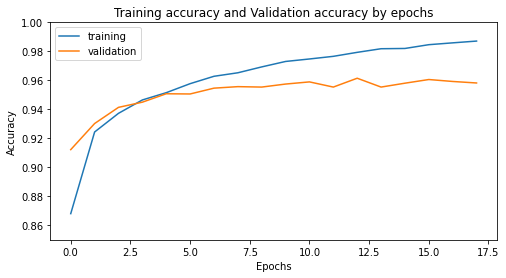

In [67]:
fig = plt.figure(figsize = (8,4))
ax1= plt.plot(history.history["accuracy"], label = "training")
ax2 = plt.plot(history.history["val_accuracy"], label = "validation")
plt.legend(loc="upper left")
plt.xlabel("Epochs")
plt.ylim(0.85,1)
plt.ylabel("Accuracy")
plt.title("Training accuracy and Validation accuracy by epochs");

In [100]:
test_accuracy = model_1.evaluate(X_test, y_test)[1]
test_accuracy

263/263 [==============================] - 0s 2ms/step - loss: 0.1750 - accuracy: 0.9504


0.9503571391105652

In [146]:
Comparison_table  = Comparison_table.append({"model": "Shallow NN 1", "Test accuracy": np.round(test_accuracy,6) }, ignore_index = True)

The model achieves an accuracy of 0.9503.

###Using a Deeper Network

In [68]:
model_2 = Sequential()
model_2.add(Dense(1024, input_shape = (784,), activation = "relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(512, input_shape = (784,), activation = "relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(256, input_shape = (784,), activation = "relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(128, input_shape = (784,), activation = "relu"))
#Output layer
model_2.add(Dense(10, activation = "softmax"))
model_2.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1024)              803840    
                                                                 
 dropout_3 (Dropout)         (None, 1024)              0         
                                                                 
 dense_25 (Dense)            (None, 512)               524800    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_26 (Dense)            (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_27 (Dense)            (None, 128)              

In [69]:
early_stopping = EarlyStopping(monitor = "val_accuracy", patience = 3)
history = model_2.fit(X_train, y_train, epochs = 10, validation_split = 0.2, callbacks = [early_stopping])

Epoch 1/10
840/840 [==============================] - 14s 17ms/step - loss: 0.3265 - accuracy: 0.8993 - val_loss: 0.1610 - val_accuracy: 0.9528
Epoch 2/10
840/840 [==============================] - 14s 16ms/step - loss: 0.1643 - accuracy: 0.9513 - val_loss: 0.1229 - val_accuracy: 0.9662
Epoch 3/10
840/840 [==============================] - 13s 16ms/step - loss: 0.1166 - accuracy: 0.9654 - val_loss: 0.1205 - val_accuracy: 0.9653
Epoch 4/10
840/840 [==============================] - 13s 16ms/step - loss: 0.0988 - accuracy: 0.9717 - val_loss: 0.0996 - val_accuracy: 0.9729
Epoch 5/10
840/840 [==============================] - 13s 16ms/step - loss: 0.0806 - accuracy: 0.9756 - val_loss: 0.1021 - val_accuracy: 0.9701
Epoch 6/10
840/840 [==============================] - 13s 16ms/step - loss: 0.0756 - accuracy: 0.9783 - val_loss: 0.1092 - val_accuracy: 0.9747
Epoch 7/10
840/840 [==============================] - 13s 16ms/step - loss: 0.0632 - accuracy: 0.9821 - val_loss: 0.0923 - val_accuracy:

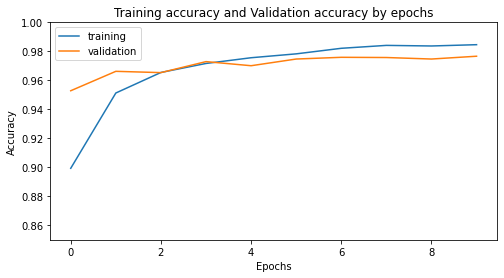

In [71]:
fig = plt.figure(figsize = (8,4))
ax1= plt.plot(history.history["accuracy"], label = "training")
ax2 = plt.plot(history.history["val_accuracy"], label = "validation")
plt.legend(loc="upper left")
plt.xlabel("Epochs")
plt.ylim(0.85,1)
plt.ylabel("Accuracy")
plt.title("Training accuracy and Validation accuracy by epochs");

In [102]:
test_accuracy = model_2.evaluate(X_test, y_test)[1]
test_accuracy

263/263 [==============================] - 1s 4ms/step - loss: 0.1225 - accuracy: 0.9738


0.973809540271759

The model acheives test accuracy of 0.9738

In [147]:
Comparison_table  = Comparison_table.append({"model": "Deep NN 1", "Test accuracy": np.round(test_accuracy,6) }, ignore_index = True)

##Using Convolution Neural Networks

In [95]:
model_cnn1 = Sequential()
#Layer1
model_cnn1.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = (28,28,1),activation = "relu"))
model_cnn1.add(BatchNormalization(name = "bn0"))
model_cnn1.add(MaxPooling2D(pool_size = (2,2)))
#Layer2
model_cnn1.add(Conv2D(filters = 32, kernel_size = (3,3), activation = "relu"))
model_cnn1.add(BatchNormalization(name = "bn1"))
model_cnn1.add(MaxPooling2D(pool_size = (2,2)))
#Flatten Outputs
model_cnn1.add(Flatten())
#Layer3
model_cnn1.add(Dense(128, name = "fc0"))
model_cnn1.add(BatchNormalization(name = "bn2"))
model_cnn1.add(Activation("relu", name = "ac2"))
model_cnn1.add(Dropout(0.2))
#Layer4
model_cnn1.add(Dense(64, name = "fc1"))
model_cnn1.add(BatchNormalization(name = "bn3"))
model_cnn1.add(Activation("relu", name = "ac3"))
model_cnn1.add(Dropout(0.2))
#Output
model_cnn1.add(Dense(10, name = "output", activation = "softmax"))


In [136]:
model_cnn1.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 bn0 (BatchNormalization)    (None, 26, 26, 64)        256       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 11, 11, 32)        18464     
                                                                 
 bn1 (BatchNormalization)    (None, 11, 11, 32)        128       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                

In [96]:
model_cnn1.compile(optimizer = "adam", loss = "categorical_crossentropy",  metrics = ["accuracy"])


In [97]:
history = model_cnn1.fit(X_train_r, y_train, validation_split = 0.2, epochs = 20, callbacks = [early_stopping])

Epoch 1/20
840/840 [==============================] - 43s 50ms/step - loss: 0.2605 - accuracy: 0.9310 - val_loss: 0.0749 - val_accuracy: 0.9760
Epoch 2/20
840/840 [==============================] - 43s 51ms/step - loss: 0.0905 - accuracy: 0.9749 - val_loss: 0.0452 - val_accuracy: 0.9859
Epoch 3/20
840/840 [==============================] - 43s 51ms/step - loss: 0.0673 - accuracy: 0.9796 - val_loss: 0.0372 - val_accuracy: 0.9893
Epoch 4/20
840/840 [==============================] - 42s 50ms/step - loss: 0.0542 - accuracy: 0.9839 - val_loss: 0.0414 - val_accuracy: 0.9878
Epoch 5/20
840/840 [==============================] - 42s 51ms/step - loss: 0.0444 - accuracy: 0.9868 - val_loss: 0.0405 - val_accuracy: 0.9882
Epoch 6/20
840/840 [==============================] - 42s 50ms/step - loss: 0.0380 - accuracy: 0.9872 - val_loss: 0.0337 - val_accuracy: 0.9897
Epoch 7/20
840/840 [==============================] - 42s 50ms/step - loss: 0.0352 - accuracy: 0.9896 - val_loss: 0.0404 - val_accuracy:

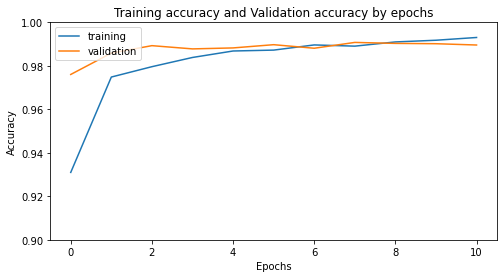

In [105]:
fig = plt.figure(figsize = (8,4))
ax1= plt.plot(history.history["accuracy"], label = "training")
ax2 = plt.plot(history.history["val_accuracy"], label = "validation")
plt.legend(loc="upper left")
plt.xlabel("Epochs")
plt.ylim(0.9,1)
plt.ylabel("Accuracy")
plt.title("Training accuracy and Validation accuracy by epochs");

In [148]:
test_accuracy = model_cnn1.evaluate(X_test_r, y_test)[1]
Comparison_table = Comparison_table.append({"model": "CNN 1", "Test accuracy": np.round(test_accuracy,6) }, ignore_index = True)


263/263 [==============================] - 3s 12ms/step - loss: 0.0503 - accuracy: 0.9871


###Using a Deeper Neural Network

In [131]:
model_cnn2 = Sequential()
#Layer1
model_cnn2.add(Conv2D(64,(3,3), input_shape = (28,28,1),activation = "tanh"))
model_cnn2.add(BatchNormalization(name = "bn0"))
model_cnn2.add(AveragePooling2D(pool_size = (2,2)))
#Layer2
model_cnn2.add(Conv2D(32,(3,3), activation = "relu"))
model_cnn2.add(BatchNormalization(name = "bn1"))
model_cnn2.add(MaxPooling2D(pool_size = (2,2)))
#New Layer
model_cnn2.add(Conv2D(16,(3,3), activation = "tanh"))
model_cnn2.add(BatchNormalization(name = "bn4"))
model_cnn2.add(AveragePooling2D(pool_size = (2,2)))
#Flatten Outputs
model_cnn2.add(Flatten())
#Layer3
model_cnn2.add(Dense(128,activation="relu"))
model_cnn2.add(BatchNormalization(name = "bn2"))
model_cnn2.add(Dropout(0.1))
#Layer4
model_cnn2.add(Dense(64,activation = "relu"))
model_cnn2.add(BatchNormalization(name = "bn3"))
model_cnn2.add(Dropout(0.1))
#New Layer
model_cnn2.add(Dense(32,activation = "relu"))
model_cnn2.add(BatchNormalization(name = "bn5"))
model_cnn2.add(Dropout(0.1))
#Output
model_cnn2.add(Dense(10, name = "output", activation = "softmax"))
model_cnn2.compile(optimizer = "adam", loss = "categorical_crossentropy",  metrics = ["accuracy"])
model_cnn2.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 bn0 (BatchNormalization)    (None, 26, 26, 64)        256       
                                                                 
 average_pooling2d_13 (Avera  (None, 13, 13, 64)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_43 (Conv2D)          (None, 11, 11, 32)        18464     
                                                                 
 bn1 (BatchNormalization)    (None, 11, 11, 32)        128       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                

Hyperparameter tuning: Trying new activation functions and adding dropout regularization.

In [132]:
model_cnn2.compile(optimizer = "adam", loss = "categorical_crossentropy",  metrics = ["accuracy"])

In [134]:
history = model_cnn2.fit(X_train_r, y_train, validation_split = 0.2, epochs = 20)

Epoch 1/20
840/840 [==============================] - 39s 47ms/step - loss: 0.1109 - accuracy: 0.9675 - val_loss: 0.1125 - val_accuracy: 0.9677
Epoch 2/20
840/840 [==============================] - 39s 47ms/step - loss: 0.1079 - accuracy: 0.9686 - val_loss: 0.0892 - val_accuracy: 0.9741
Epoch 3/20
840/840 [==============================] - 39s 47ms/step - loss: 0.0974 - accuracy: 0.9718 - val_loss: 0.0883 - val_accuracy: 0.9732
Epoch 4/20
840/840 [==============================] - 39s 47ms/step - loss: 0.0934 - accuracy: 0.9726 - val_loss: 0.1035 - val_accuracy: 0.9708
Epoch 5/20
840/840 [==============================] - 39s 47ms/step - loss: 0.0858 - accuracy: 0.9739 - val_loss: 0.0748 - val_accuracy: 0.9787
Epoch 6/20
840/840 [==============================] - 39s 47ms/step - loss: 0.0816 - accuracy: 0.9751 - val_loss: 0.1020 - val_accuracy: 0.9711
Epoch 7/20
840/840 [==============================] - 39s 47ms/step - loss: 0.0778 - accuracy: 0.9768 - val_loss: 0.0819 - val_accuracy:

In [149]:
test_accuracy = model_cnn2.evaluate(X_test_r, y_test)[1]
Comparison_table = Comparison_table.append({"model": "CNN 2", "Test accuracy": np.round(test_accuracy,6) }, ignore_index = True)

263/263 [==============================] - 4s 15ms/step - loss: 0.1111 - accuracy: 0.9720


##Model Submission

We'll Choose the model that gives us the highest test set accuracy.

In [150]:
Comparison_table

,model,Test accuracy
0,Shallow NN 1,0.972024
1,Deep NN 1,0.972024
2,CNN 1,0.987143
3,CNN 2,0.972024


As per the figures, CNN2 model has the highest accuracy on the test set. So we will use CNN1 model for our submission. 

In [109]:
predictions = model_cnn1.predict((digit_test/255).values.reshape(-1,28,28,1))
predictions = np.argmax(predictions, axis = 1)
submission = pd.DataFrame({"ImageId":np.arange(len(predictions))+1, "Label":predictions}) 
submission.to_csv("submission.csv", index = False)

Thank You 